# **CNN Model**

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  , ConfusionMatrixDisplay , classification_report , f1_score , precision_score , recall_score , confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import seaborn as sns

import keras
from prettytable import PrettyTable
from tabulate import tabulate



In [2]:
categories = ['jogging' , 
              'sitting' , 
              'standing' , 
              'walking']

data_directory = '/mnt/d/CV_project_phase_1/Dataset_images/'


In [7]:

# Step 2: Data Preprocessing
image_size = (256, 256)
dataset = []
labels = []

for category in categories:
    folder_path = os.path.join(data_directory, category)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = load_img(image_path, target_size=image_size)
        image_array = img_to_array(image)
        dataset.append(image_array)
        labels.append(categories.index(category))

dataset = np.array(dataset)
labels = np.array(labels)

In [8]:
dataset.shape

(2584, 256, 256, 3)

In [9]:
train_data, val_data, train_labels, val_labels = train_test_split(dataset, labels, test_size=0.2, random_state=42)

In [6]:
# Step 4: CNN Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(categories), activation='softmax')
])

2023-06-06 13:00:11.037624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 13:00:11.052720: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
# Step 5: Model Compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=10, batch_size=32)

Epoch 1/10
65/65 [==============================] - 109s 2s/step - loss: 43.8578 - accuracy: 0.5099 - val_loss: 0.8958 - val_accuracy: 0.6402
Epoch 2/10
65/65 [==============================] - 103s 2s/step - loss: 0.6914 - accuracy: 0.7620 - val_loss: 1.1100 - val_accuracy: 0.6325
Epoch 3/10
65/65 [==============================] - 105s 2s/step - loss: 0.4191 - accuracy: 0.8433 - val_loss: 0.7188 - val_accuracy: 0.8511
Epoch 4/10
65/65 [==============================] - 103s 2s/step - loss: 0.7866 - accuracy: 0.7784 - val_loss: 0.7287 - val_accuracy: 0.7582
Epoch 5/10
65/65 [==============================] - 102s 2s/step - loss: 0.3685 - accuracy: 0.8732 - val_loss: 0.5437 - val_accuracy: 0.8162
Epoch 6/10
65/65 [==============================] - 102s 2s/step - loss: 0.2039 - accuracy: 0.9429 - val_loss: 0.6480 - val_accuracy: 0.8433
Epoch 7/10
65/65 [==============================] - 102s 2s/step - loss: 0.0827 - accuracy: 0.9753 - val_loss: 0.5574 - val_accuracy: 0.8704
Epoch 8/10
6

In [8]:
model.save('../Models/CNN.h5')

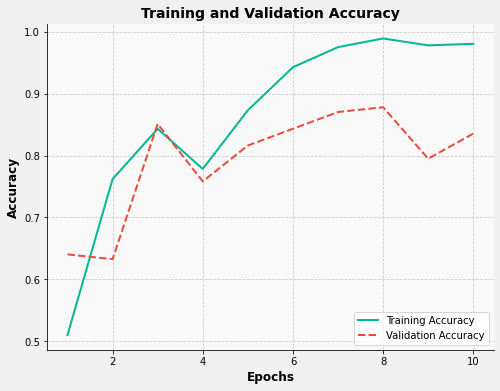

In [14]:
# Extract the accuracy and validation accuracy from the history
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']

# Plot accuracy and validation accuracy
epochs = range(1, len(accuracy) + 1)

# Set custom color palette
color_palette = ['#00b894', '#e74c3c']

# Customize figure and axes
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the width and height as needed
fig.set_facecolor('#f0f0f0')  # Set the background color of the figure
ax.set_facecolor('#ffffff')  # Set the background color of the plot area
ax.grid(color='#cccccc', linestyle='--')  # Set grid lines color and style

# Plot accuracy and validation accuracy with custom styles
ax.plot(epochs, accuracy, color_palette[0], label='Training Accuracy', linewidth=2)
ax.plot(epochs, val_accuracy, color_palette[1], label='Validation Accuracy', linewidth=2, linestyle='--')

# Customize labels and title
ax.set_xlabel('Epochs', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')

# Customize legend
ax.legend(loc='lower right', fontsize=10)

# Add a subtle background pattern
ax.set_facecolor('#f8f8f8')
ax.set_alpha(0.9)
ax.set_zorder(0)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


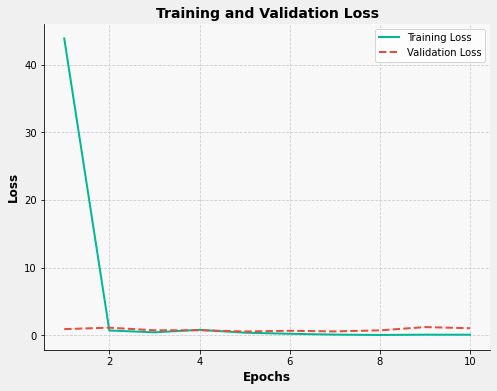

In [13]:
# Extract the loss and validation loss from the history
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

# Plot loss and validation loss
epochs = range(1, len(loss) + 1)

# Set custom color palette
color_palette = ['#00b894', '#e74c3c']

# Customize figure and axes
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the width and height as needed
fig.set_facecolor('#f0f0f0')  # Set the background color of the figure
ax.set_facecolor('#ffffff')  # Set the background color of the plot area
ax.grid(color='#cccccc', linestyle='--')  # Set grid lines color and style

# Plot loss and validation loss with custom styles
ax.plot(epochs, loss, color_palette[0], label='Training Loss', linewidth=2)
ax.plot(epochs, val_loss, color_palette[1], label='Validation Loss', linewidth=2, linestyle='--')

# Customize labels and title
ax.set_xlabel('Epochs', fontsize=12, fontweight='bold')
ax.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')

# Customize legend
ax.legend(loc='upper right', fontsize=10)

# Add a subtle background pattern
ax.set_facecolor('#f8f8f8')
ax.set_alpha(0.9)
ax.set_zorder(0)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

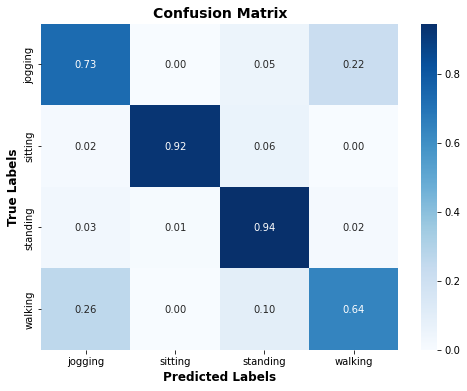

In [22]:
predictions = model.predict(val_data)
predicted_labels = np.argmax(predictions, axis=1)


class_names = ['jogging' , 
              'sitting' , 
              'standing' , 
              'walking']
# Create confusion matrix
cm = confusion_matrix(val_labels, predicted_labels)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the heatmap colors
cmap = 'Blues'  # Change the color palette here

# Plot the heatmap
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap=cmap, xticklabels=class_names, yticklabels=class_names, ax=ax)

# Customize labels and title
ax.set_xlabel('Predicted Labels', fontsize=12, fontweight='bold')
ax.set_ylabel('True Labels', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

plt.show()



In [5]:
model = keras.models.load_model('../Models/CNN.h5')

2023-06-06 14:18:35.883451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 14:18:35.903064: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:

class_names = ['jogging' , 
              'sitting' , 
              'standing' , 
              'walking']


# Assuming you have test_data and test_labels for evaluation
predictions = model.predict(val_data)
predicted_labels = np.argmax(predictions, axis=1)

17/17 [==============================] - 12s 448ms/step


In [17]:
report = classification_report(val_labels, predicted_labels, target_names=class_names, output_dict=True)

# Create a pretty table
table = PrettyTable()
table.field_names = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']

# Add rows to the table
for class_name, scores in report.items():
    if class_name in class_names:
        precision = scores['precision']
        recall = scores['recall']
        f1_score = scores['f1-score']
        support = scores['support']
        table.add_row([class_name, precision, recall, f1_score, support])

# Set alignment and format for numeric columns
table.align['Class'] = 'l'
table.align['Precision'] = 'f'
table.align['Recall'] = 'f'
table.align['F1-Score'] = 'f'
table.align['Support'] = 'c'

# Print the styled classification report
print(table)

+----------+--------------------+--------------------+--------------------+---------+
| Class    |     Precision      |       Recall       |      F1-Score      | Support |
+----------+--------------------+--------------------+--------------------+---------+
| jogging  | 0.7280701754385965 | 0.7280701754385965 | 0.7280701754385965 |   114   |
| sitting  | 0.9941860465116279 | 0.9243243243243243 | 0.957983193277311  |   185   |
| standing | 0.8206896551724138 | 0.9444444444444444 | 0.8782287822878229 |   126   |
| walking  | 0.686046511627907  | 0.6413043478260869 | 0.6629213483146068 |    92   |
+----------+--------------------+--------------------+--------------------+---------+
